In [5]:
import pandas as pd
import numpy as np

import h5py
from PIL import Image
import io
import matplotlib.pyplot as plt
import seaborn as sns

# aesthetics
default_color_1 = 'darkblue'
default_color_2 = 'darkgreen'
default_color_3 = 'darkred'

In [6]:
train_metadata = pd.read_csv('../isic-2024-challenge/train-metadata.csv')
test_metadata = pd.read_csv('../isic-2024-challenge/test-metadata.csv')
print(train_metadata.shape)
print(test_metadata.shape)

/var/folders/8_/5flywyvj7tbdsm2tfw9gr4nh0000gn/T/ipykernel_98709/3859578890.py:1: DtypeWarning: Columns (51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  train_metadata = pd.read_csv('../isic-2024-challenge/train-metadata.csv')


(401059, 55)
(3, 44)


There are columns that are included only in `train-metadata.csv`. Use columns that are included in both train and test for now.

In [7]:
# categorical
features_cat =['sex', 'anatom_site_general', 'image_type', 'tbp_tile_type',
               'tbp_lv_location', 'tbp_lv_location_simple', 'attribution', 'copyright_license']

# numerical
features_num = ['age_approx', 'clin_size_long_diam_mm', 'tbp_lv_A', 'tbp_lv_Aext', 'tbp_lv_B', 'tbp_lv_Bext',
                'tbp_lv_C', 'tbp_lv_Cext', 'tbp_lv_H', 'tbp_lv_Hext', 
                'tbp_lv_L', 'tbp_lv_Lext', 'tbp_lv_areaMM2',
                'tbp_lv_area_perim_ratio', 'tbp_lv_color_std_mean', 'tbp_lv_deltaA', 'tbp_lv_deltaB',
                'tbp_lv_deltaL', 'tbp_lv_deltaLB', 'tbp_lv_deltaLBnorm', 'tbp_lv_eccentricity',
                'tbp_lv_minorAxisMM', 'tbp_lv_nevi_confidence', 'tbp_lv_norm_border', 'tbp_lv_norm_color', 
                'tbp_lv_perimeterMM', 'tbp_lv_radial_color_std_max', 'tbp_lv_stdL', 
                'tbp_lv_stdLExt', 'tbp_lv_symm_2axis', 'tbp_lv_symm_2axis_angle', 
                'tbp_lv_x', 'tbp_lv_y', 'tbp_lv_z']

# target
target = 'target'

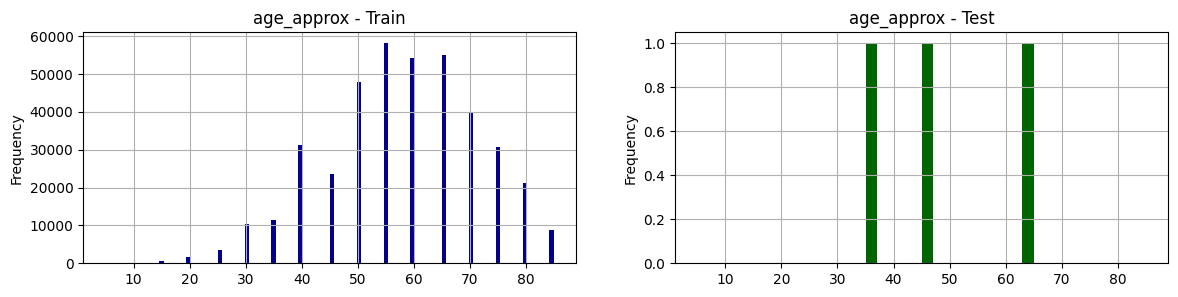

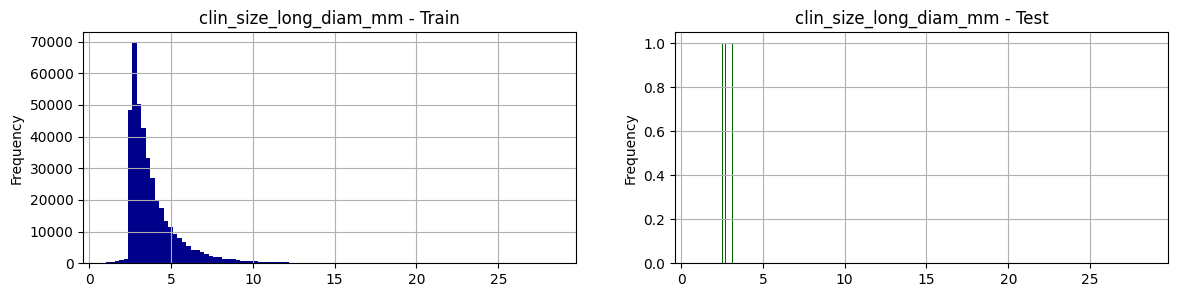

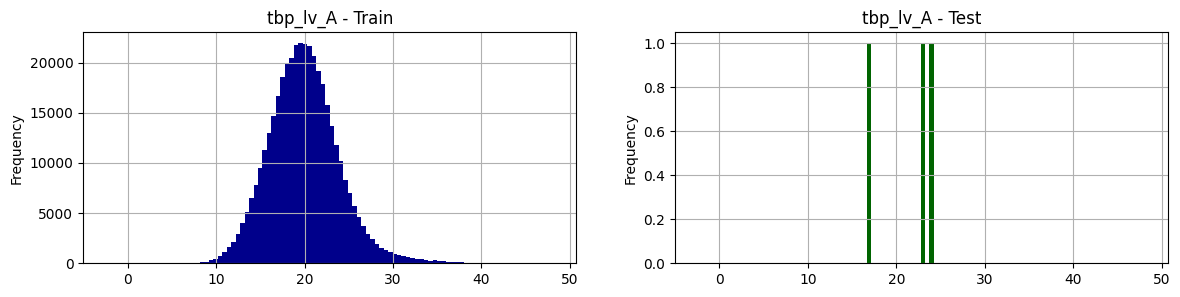

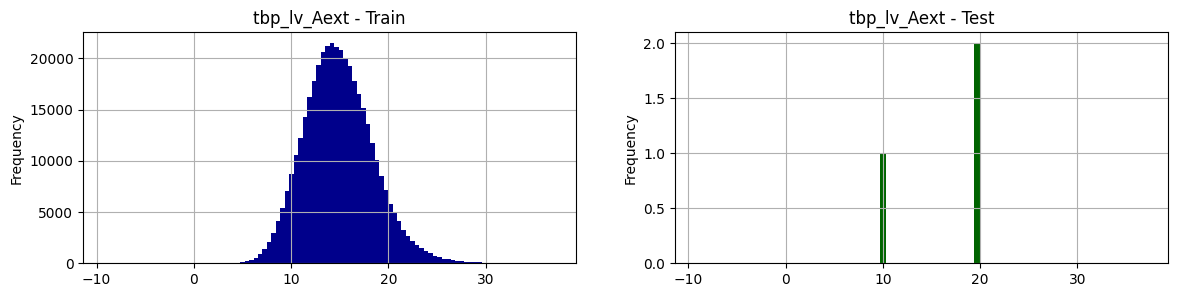

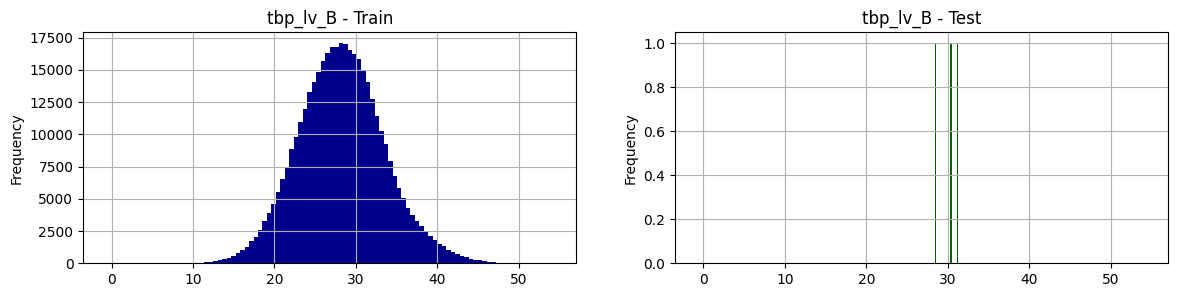

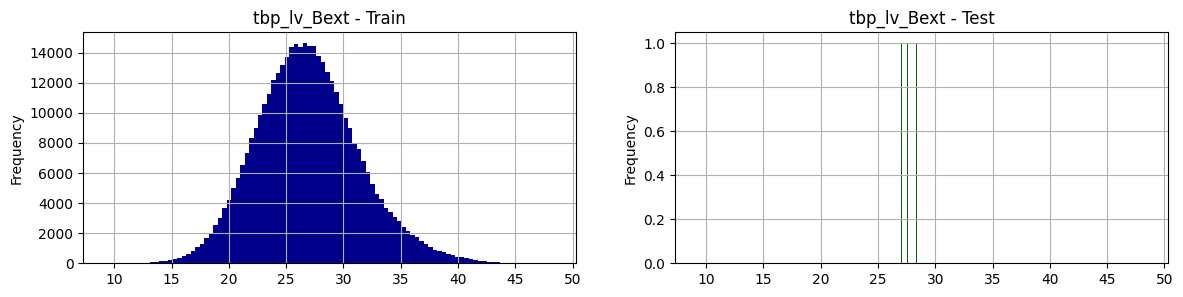

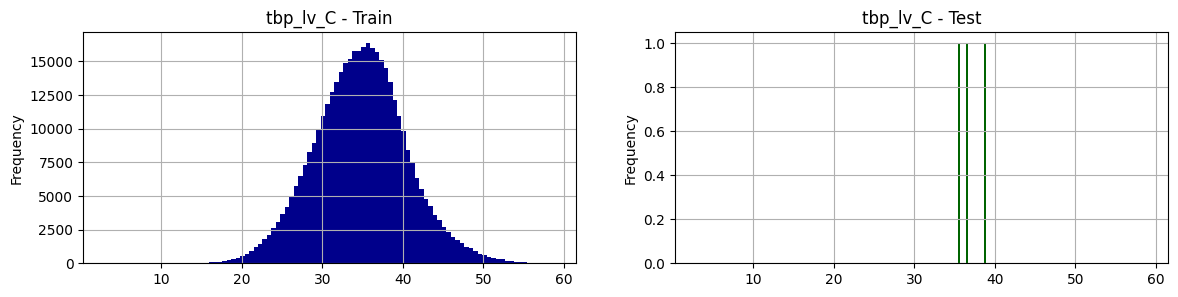

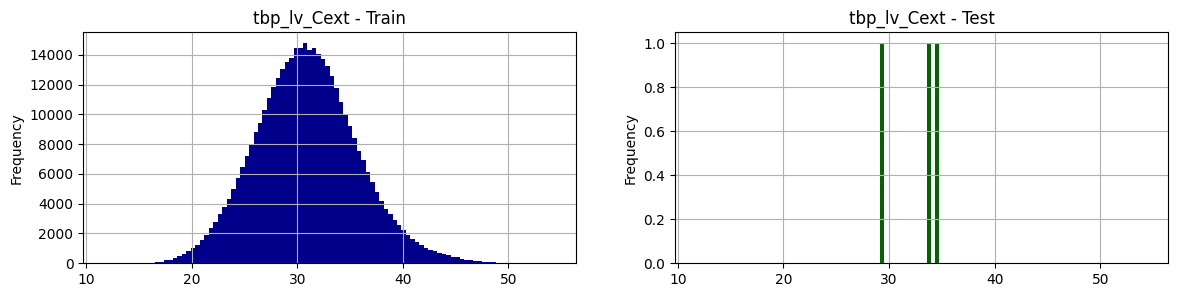

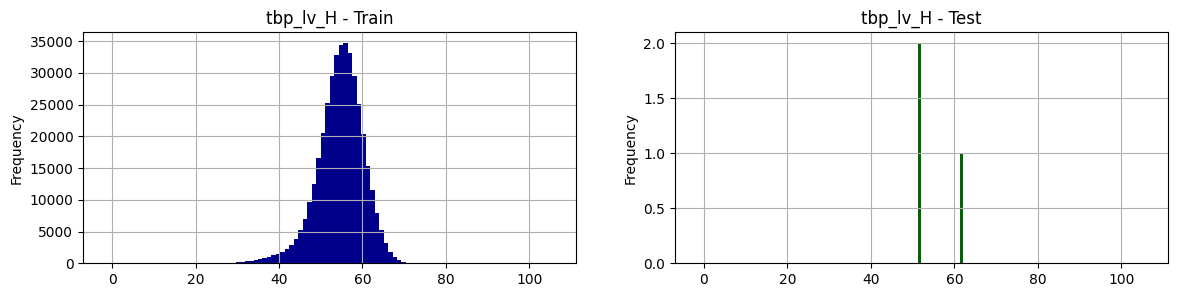

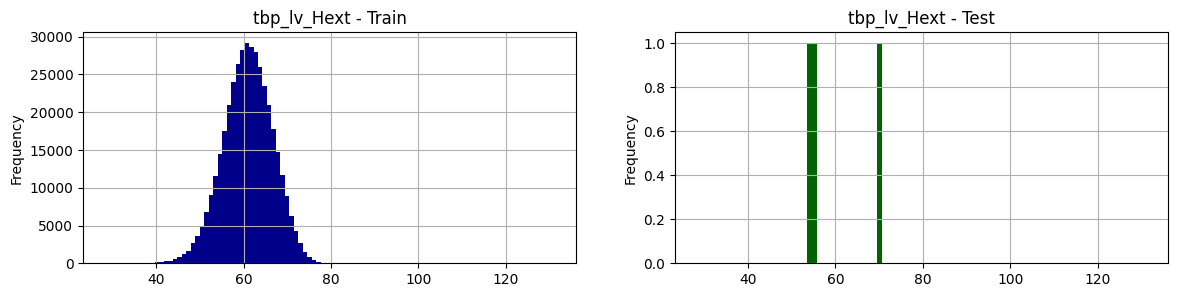

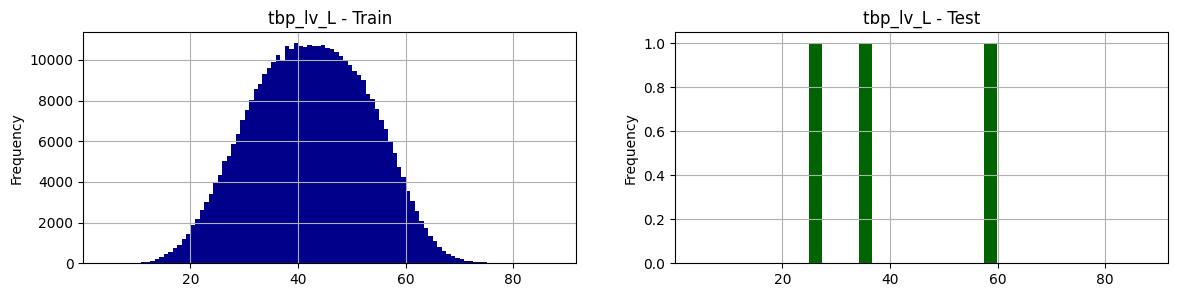

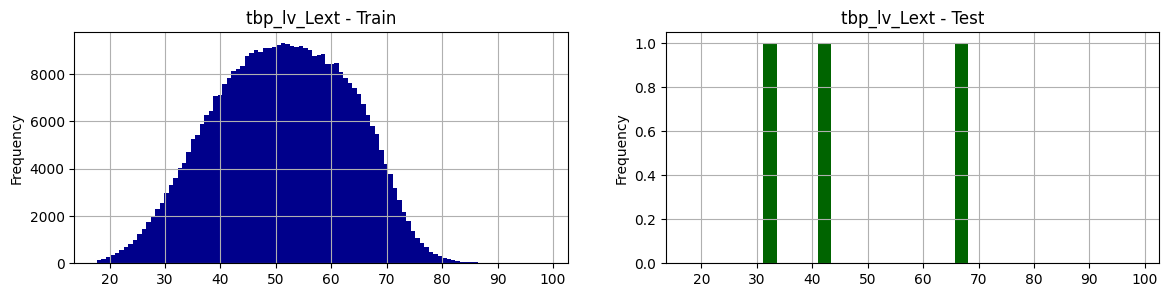

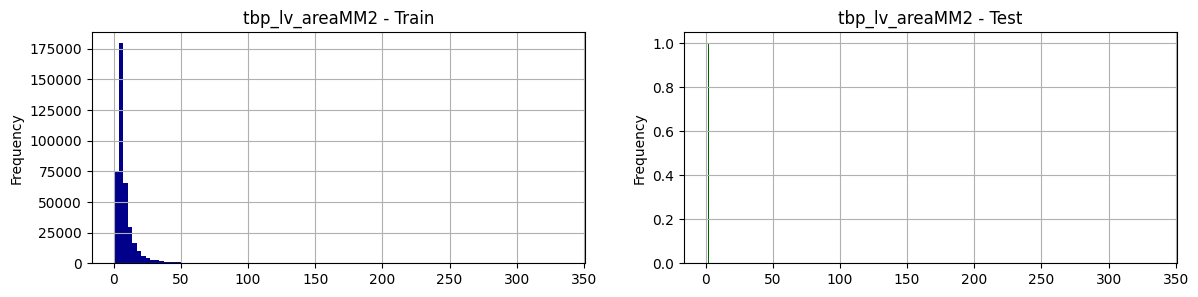

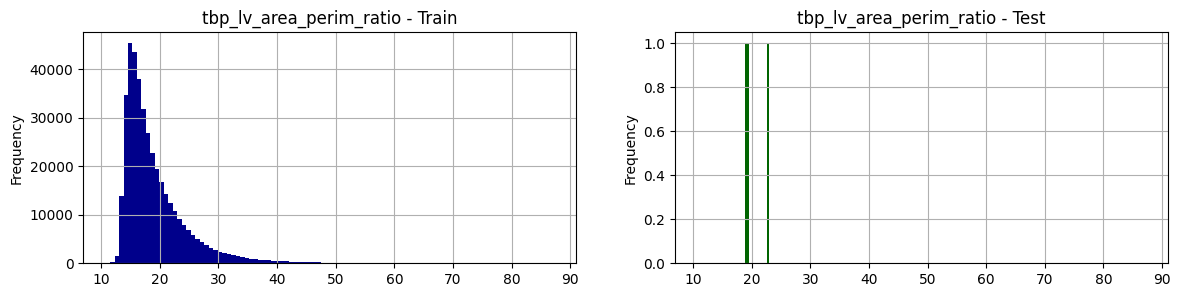

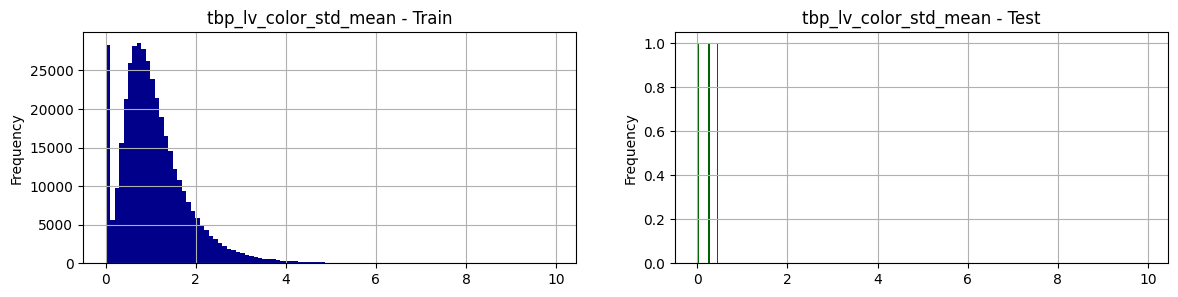

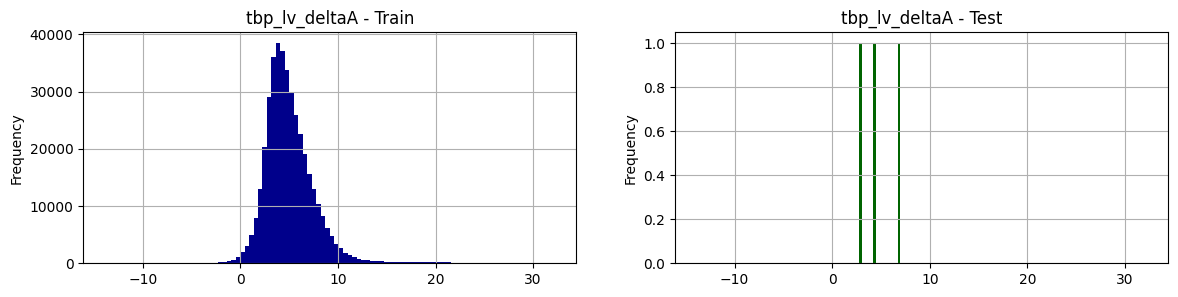

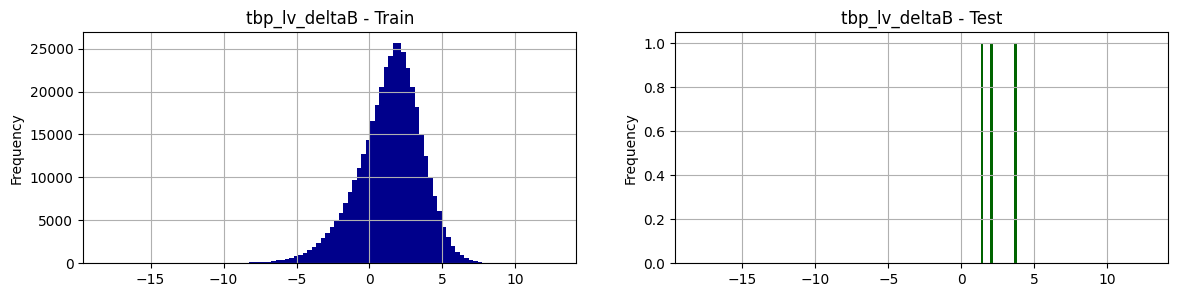

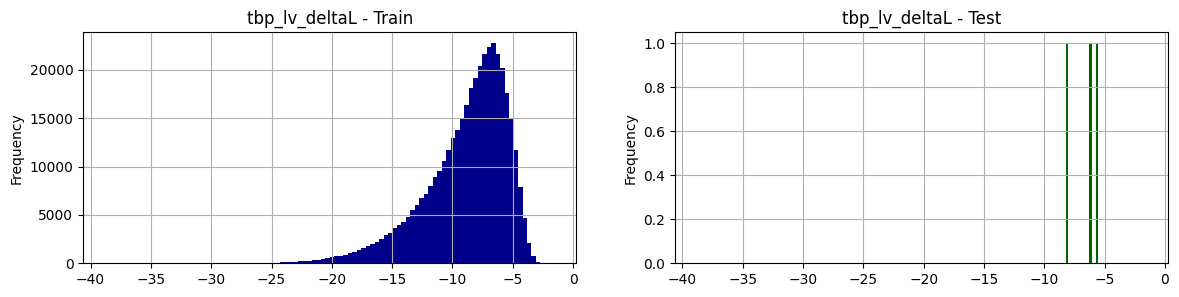

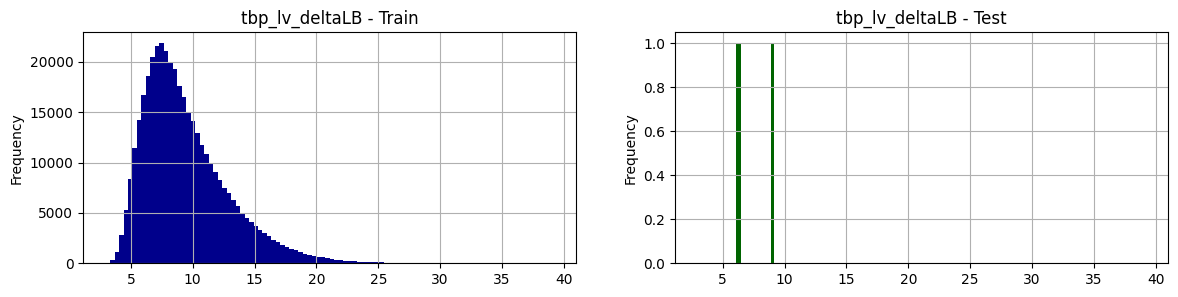

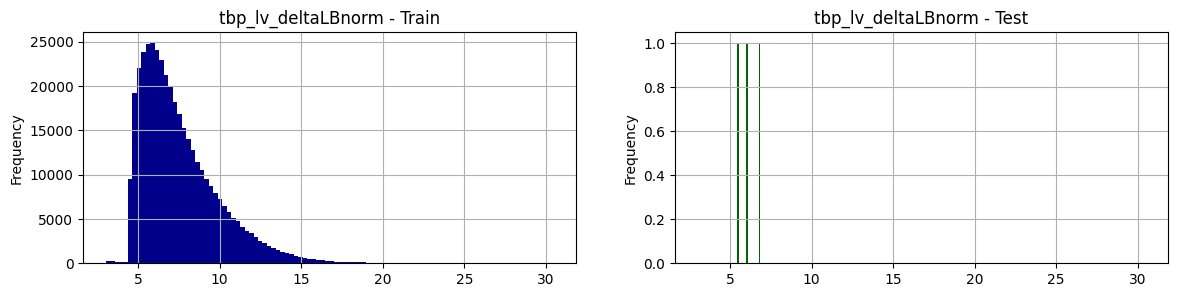

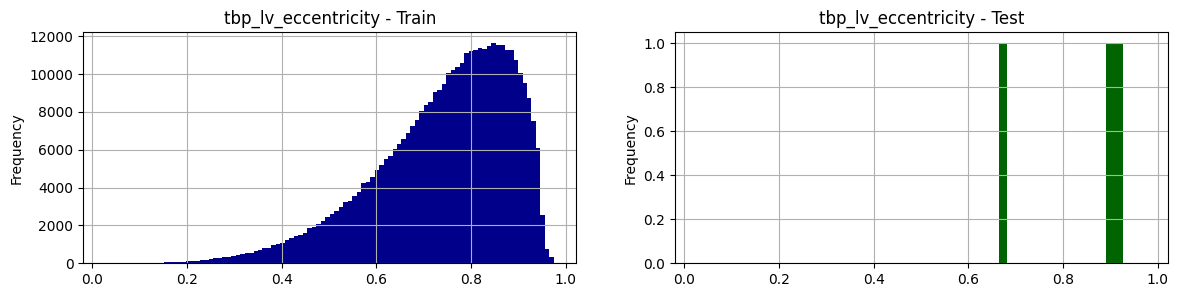

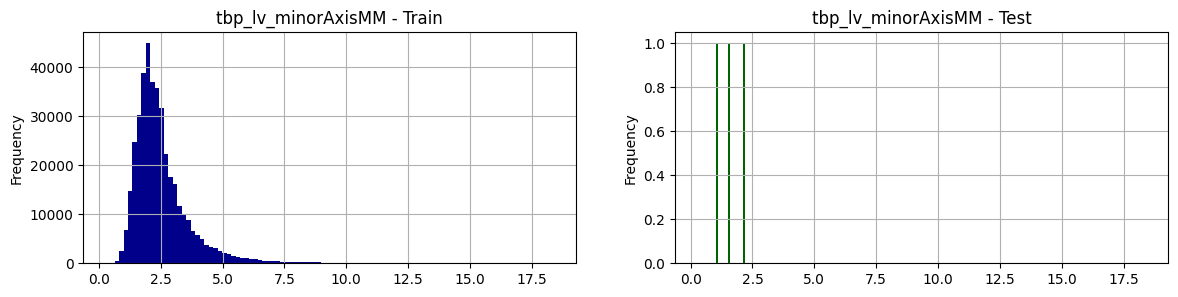

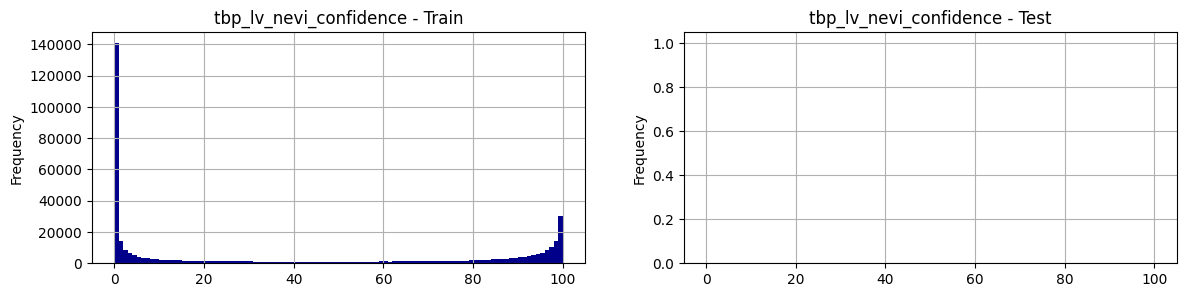

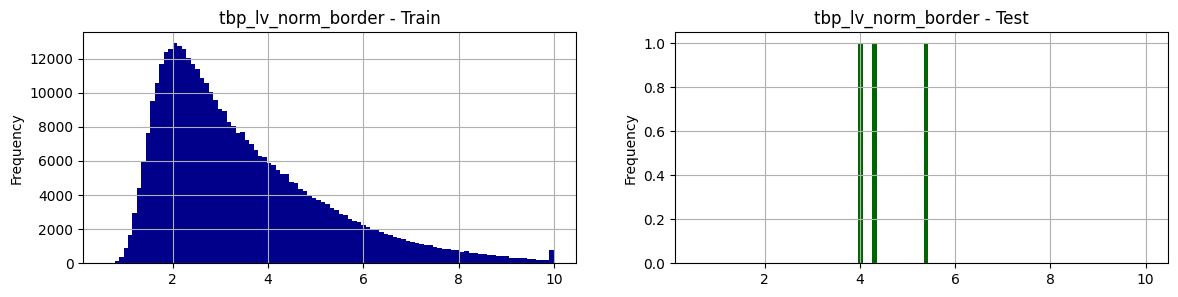

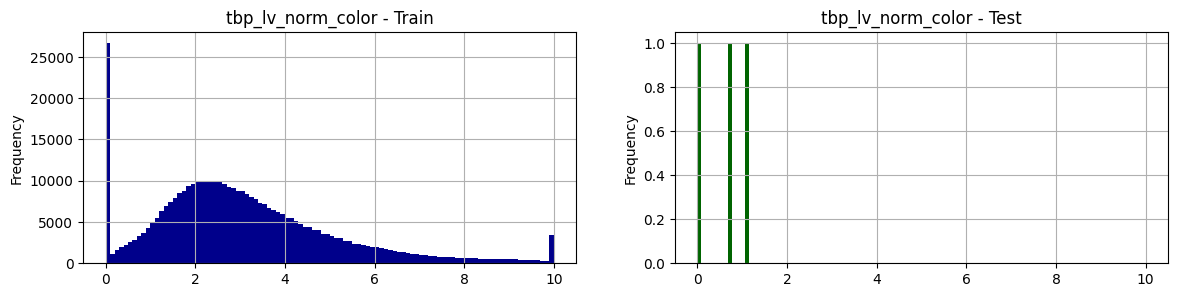

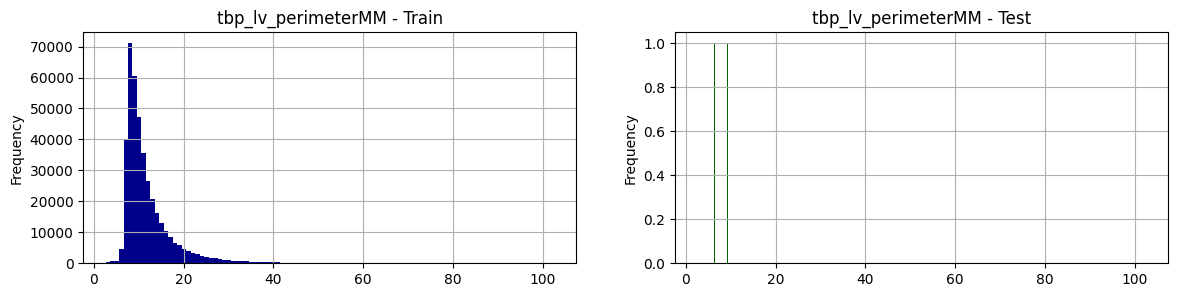

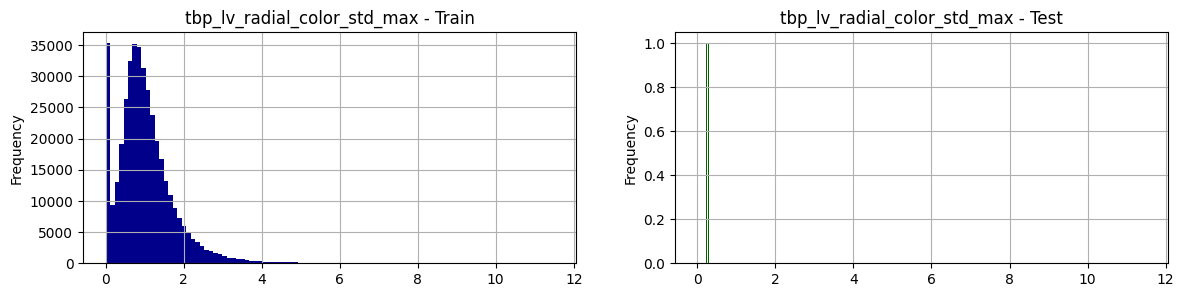

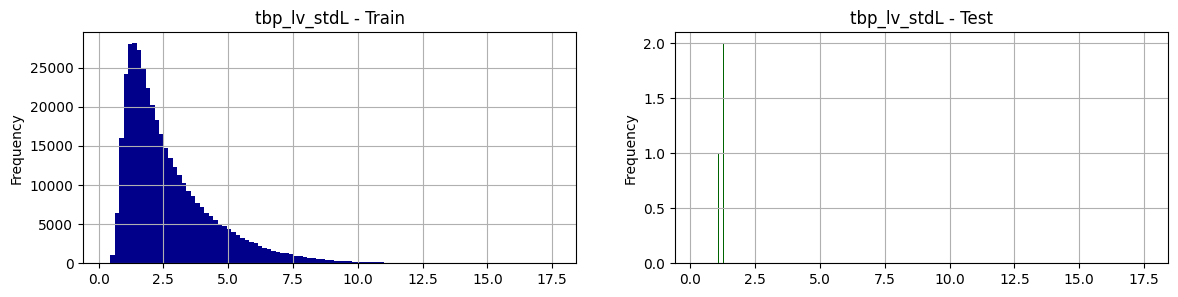

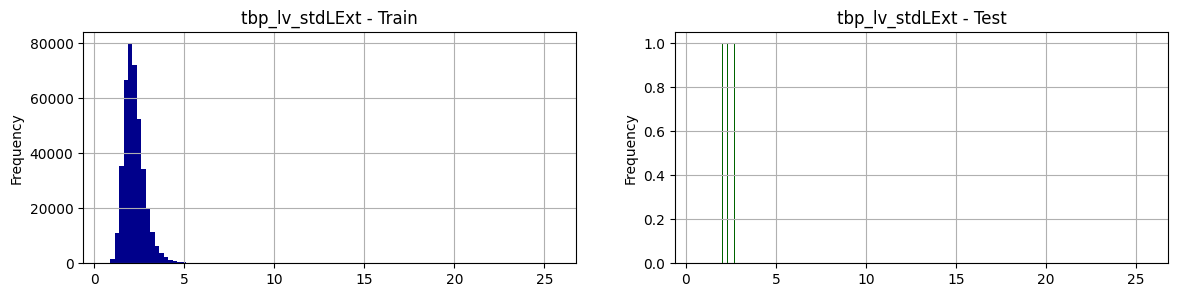

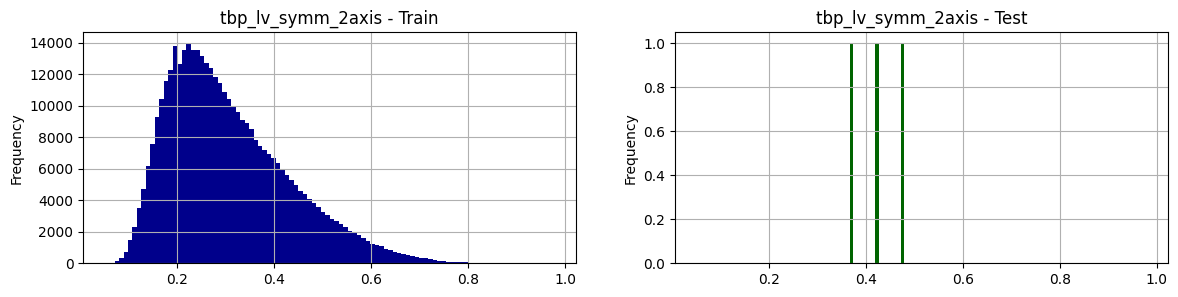

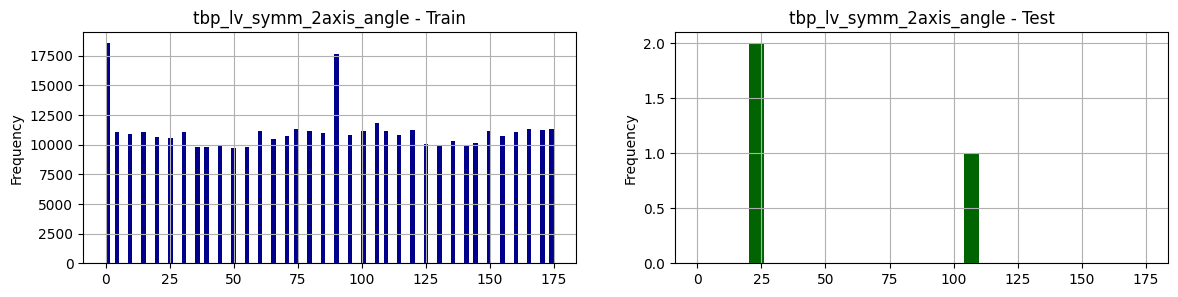

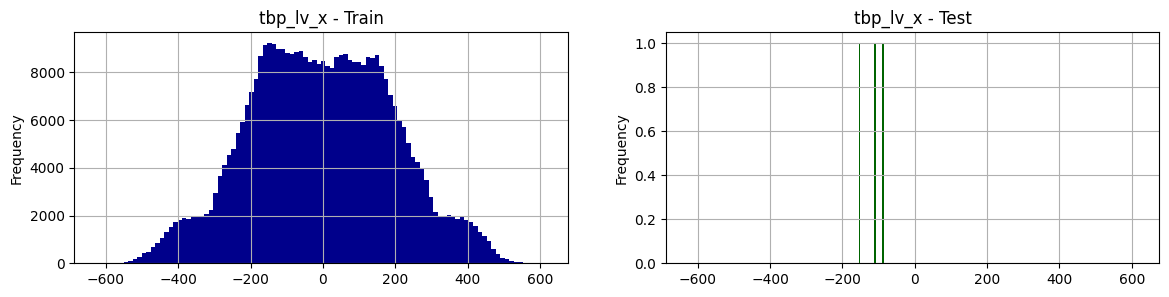

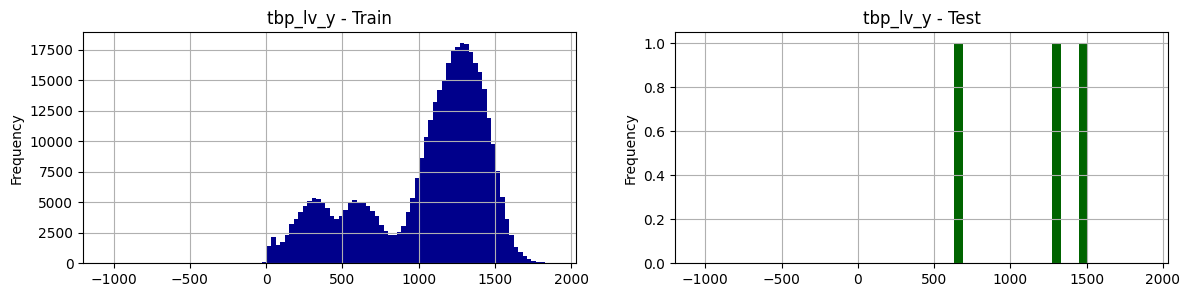

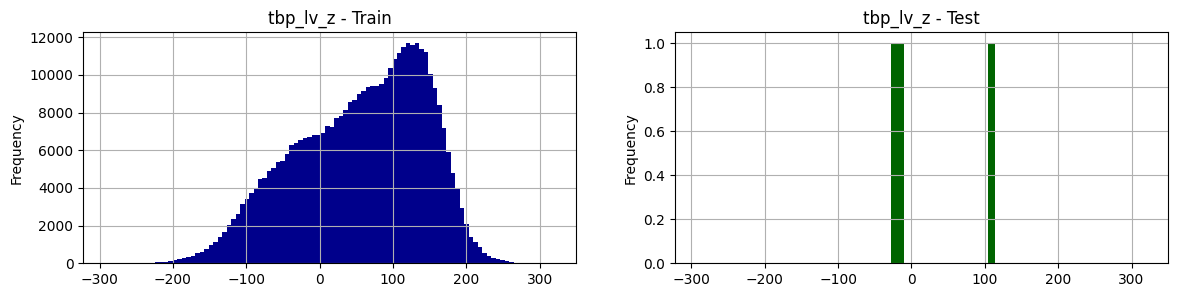

In [8]:
# plot histograms (train and test)
for f in features_num:
    plt.figure(figsize=(14,3))
    ax1 = plt.subplot(1,2,1)
    train_metadata[f].plot(kind='hist', bins=100, color=default_color_1)
    plt.title(f + ' - Train')
    plt.grid()
    ax2 = plt.subplot(1,2,2, sharex=ax1)
    test_metadata[f].plot(kind='hist', bins=15, color=default_color_2)
    plt.title(f + ' - Test')
    plt.grid()
    plt.show()

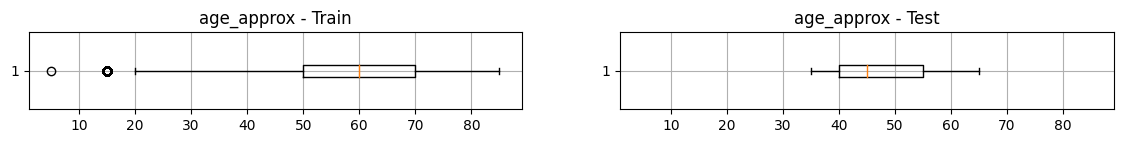

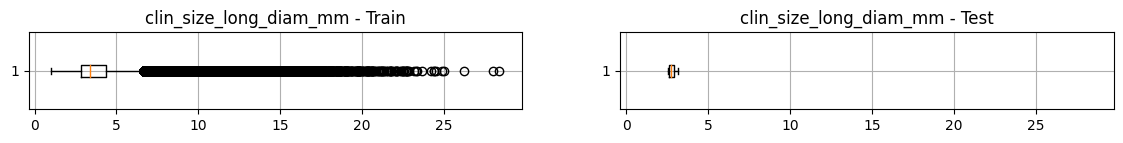

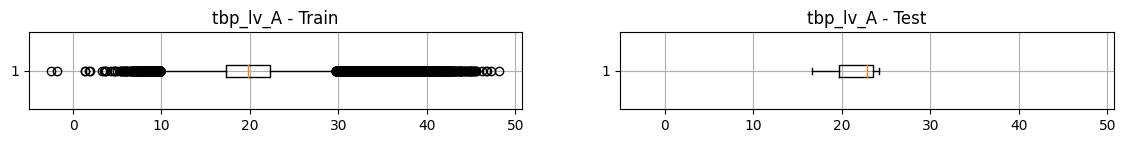

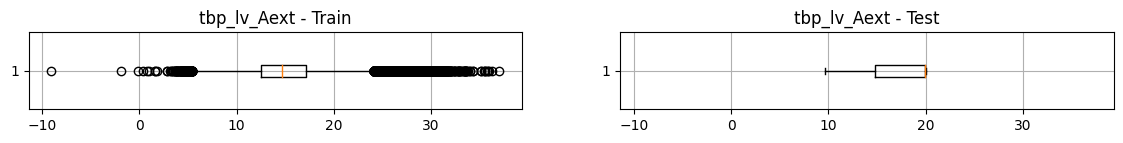

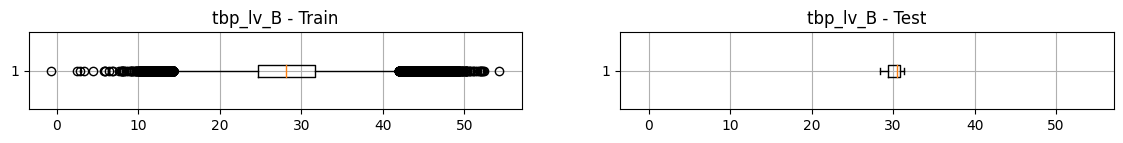

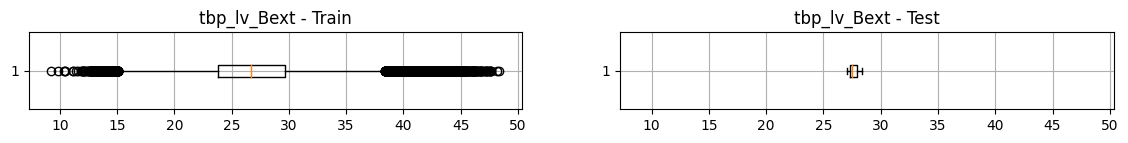

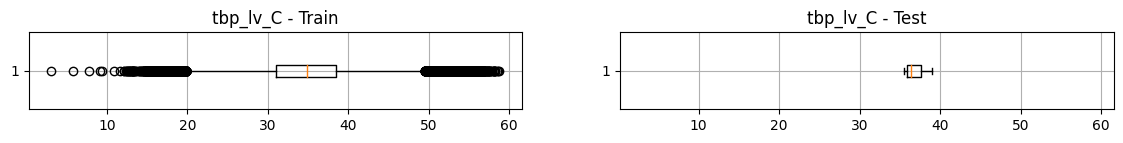

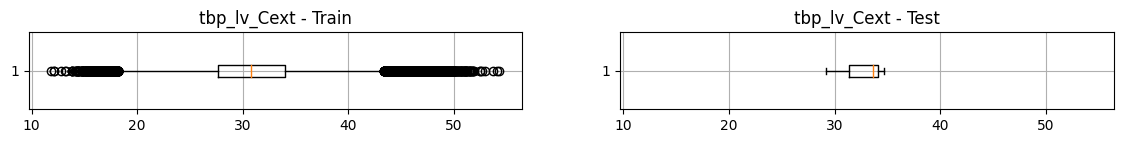

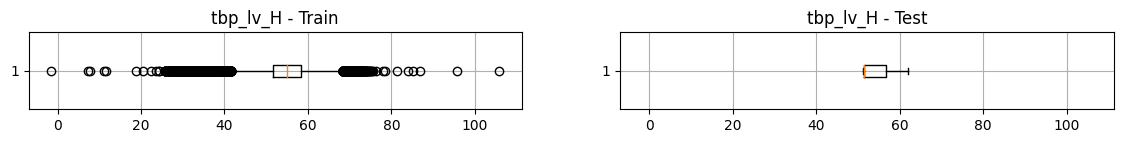

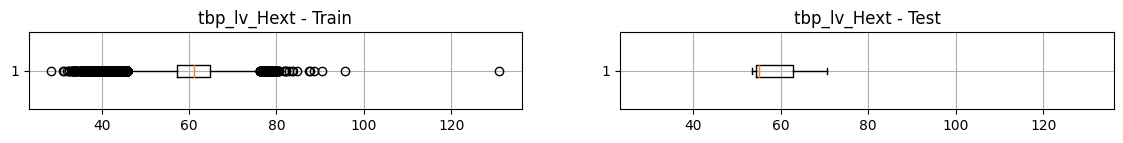

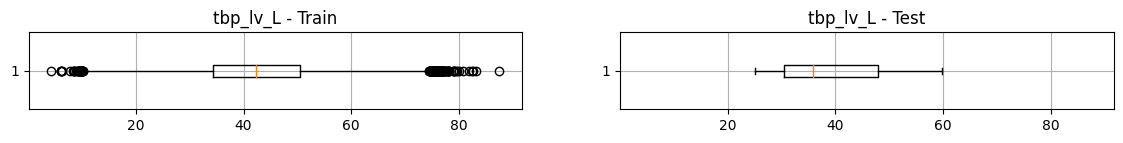

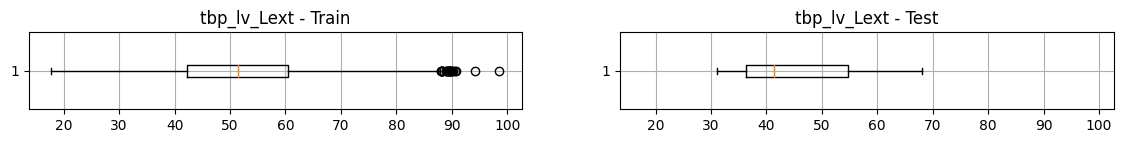

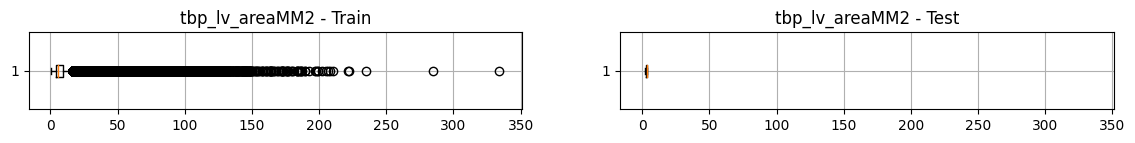

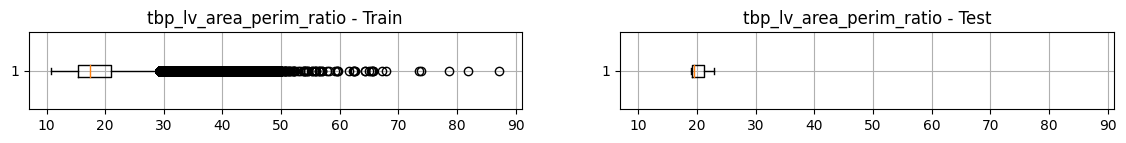

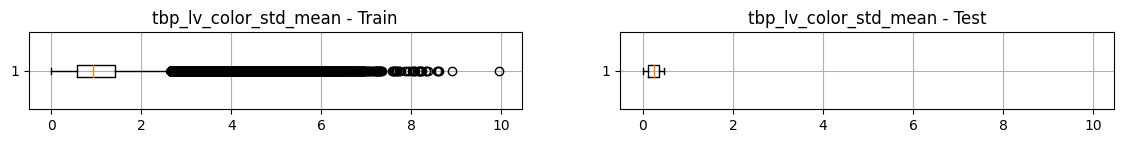

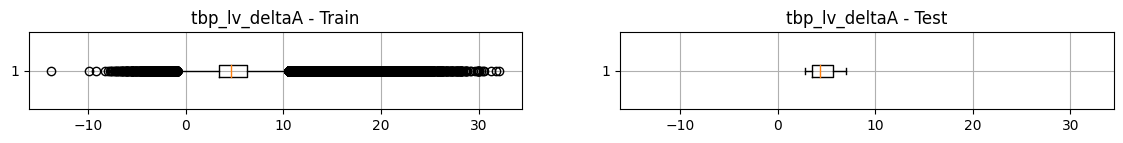

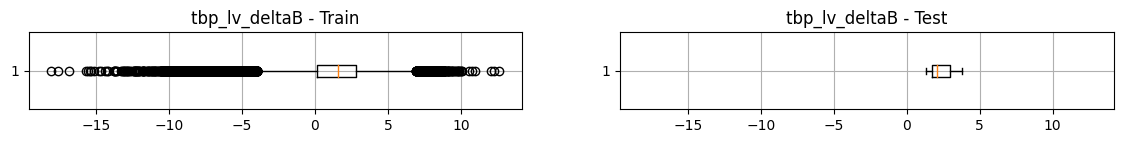

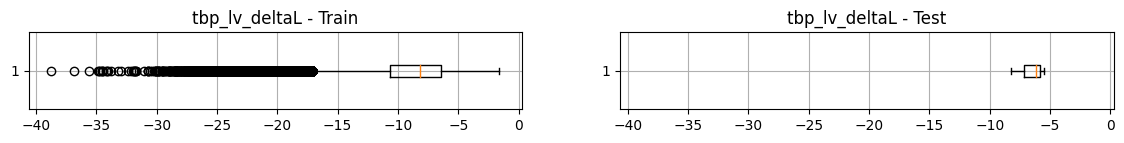

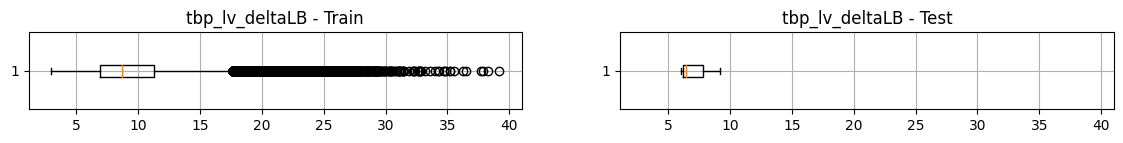

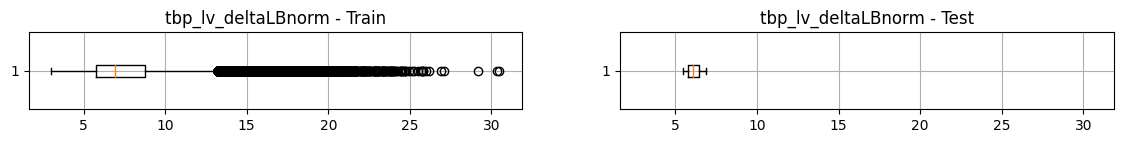

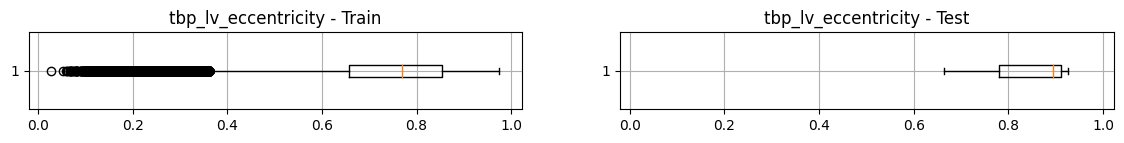

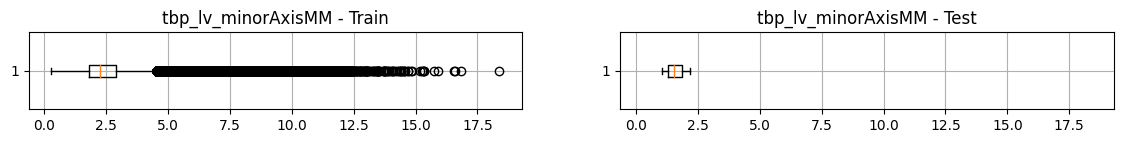

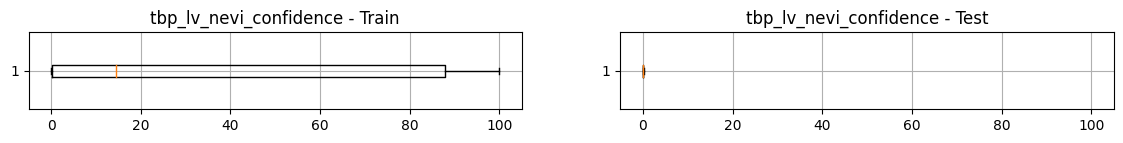

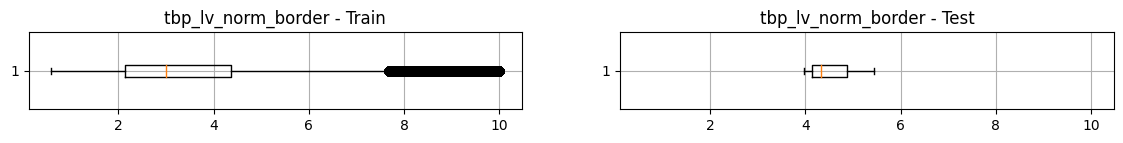

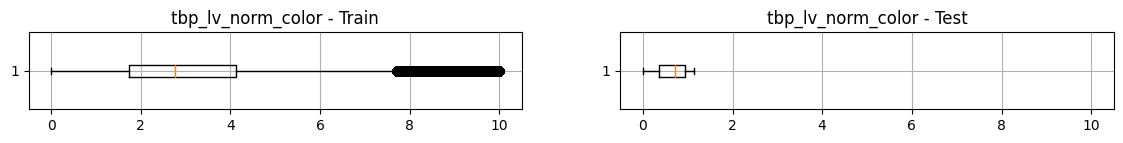

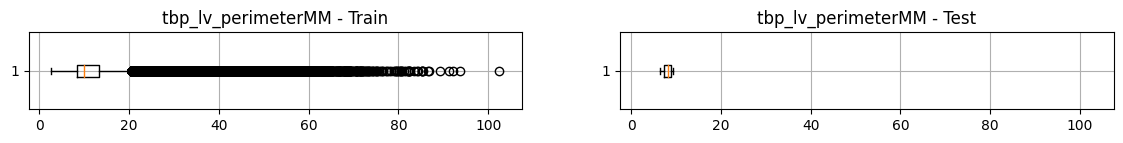

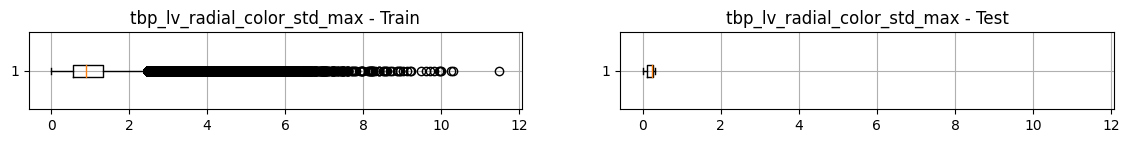

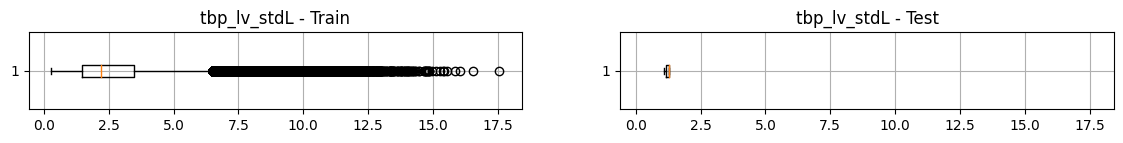

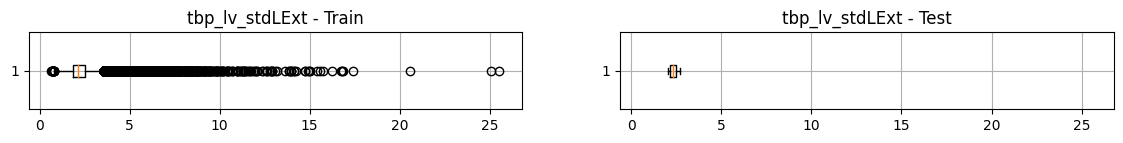

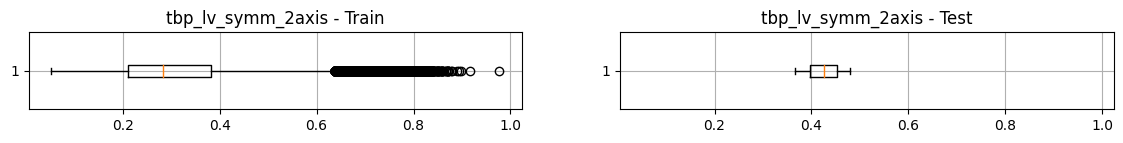

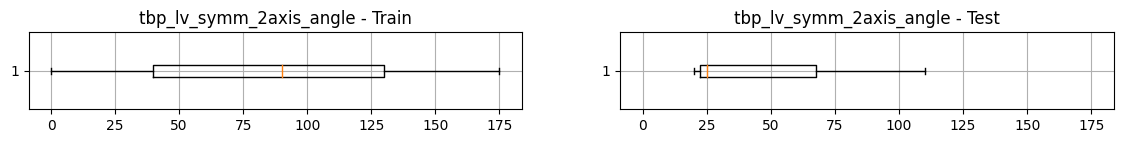

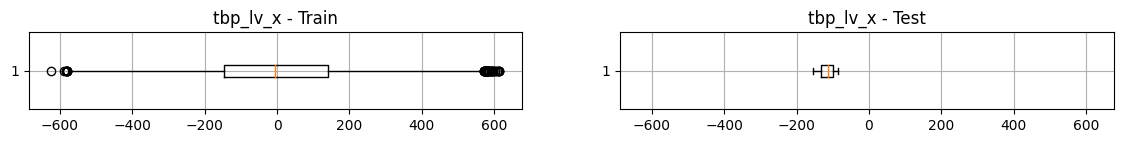

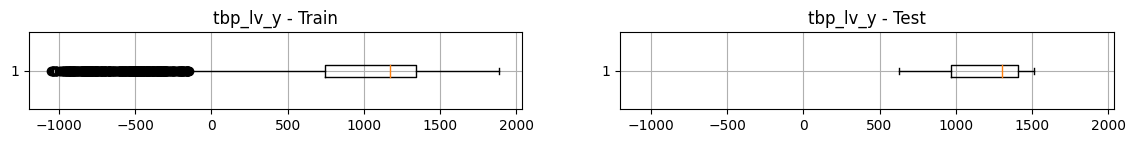

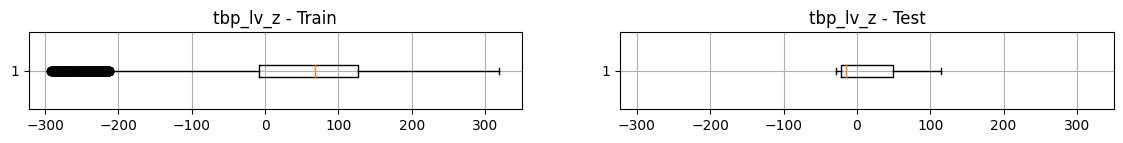

In [9]:
# boxplots (train and test)
for f in features_num:
    plt.figure(figsize=(14,1))
    ax1 = plt.subplot(1,2,1)
    df_temp = train_metadata[f].dropna() # boxplot does not like missings...
    plt.boxplot(df_temp, vert=False)
    plt.title(f + ' - Train')
    plt.grid()
    ax2 = plt.subplot(1,2,2, sharex=ax1)
    df_temp = test_metadata[f].dropna()
    plt.boxplot(df_temp, vert=False)
    plt.title(f + ' - Test')
    plt.grid()
    plt.show()

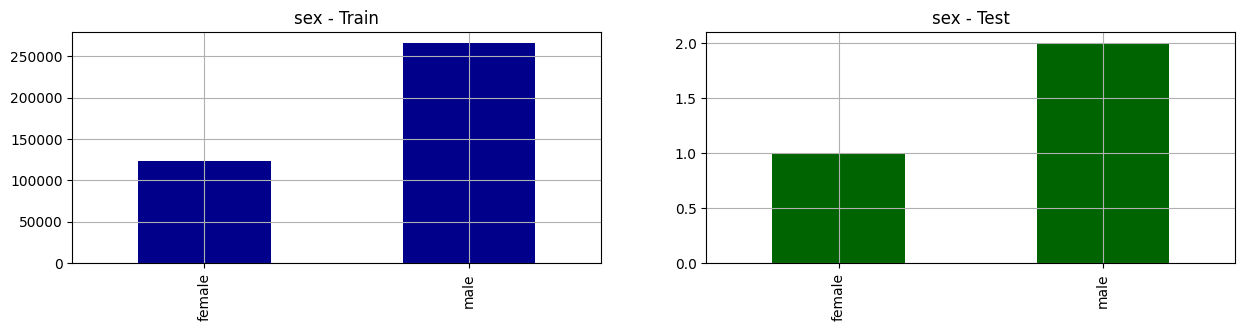

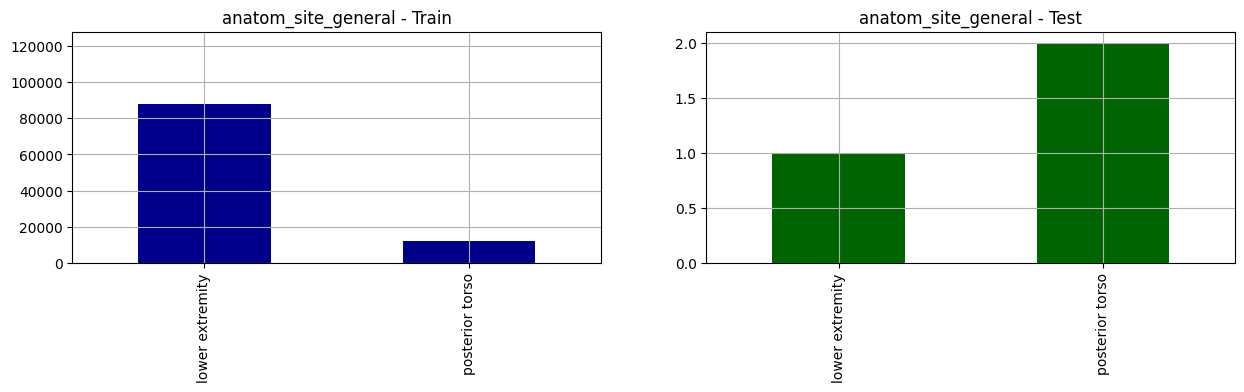

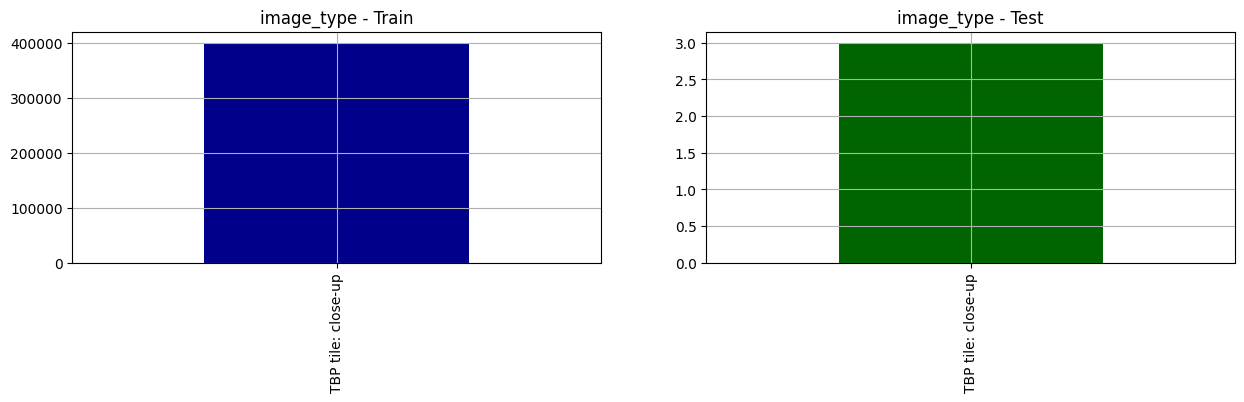

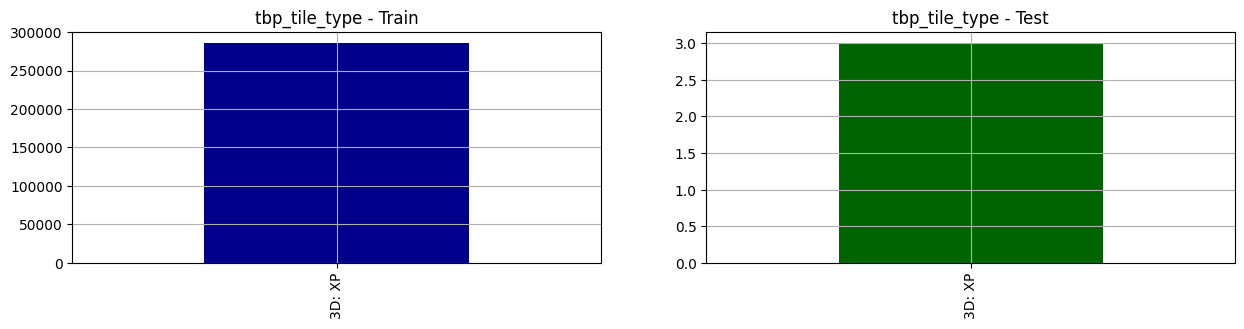

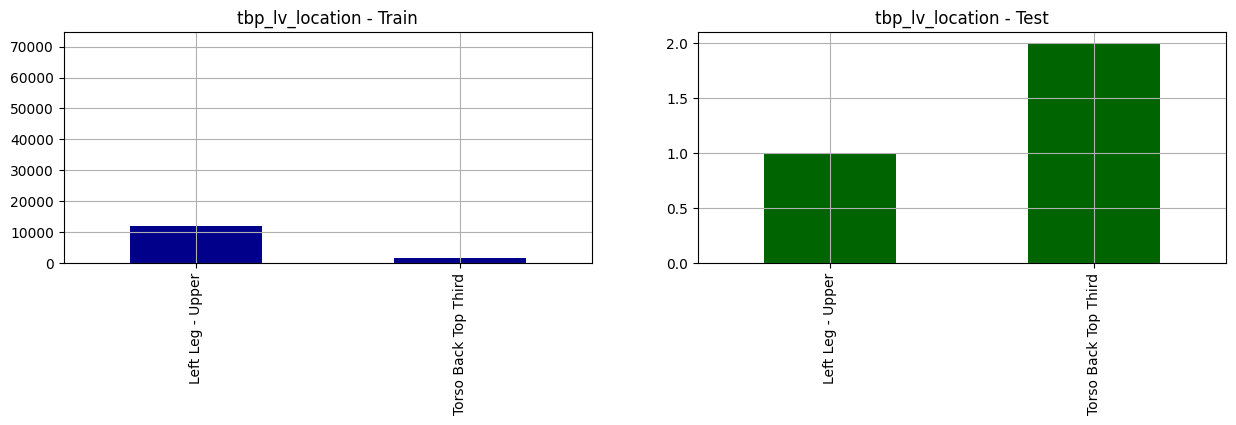

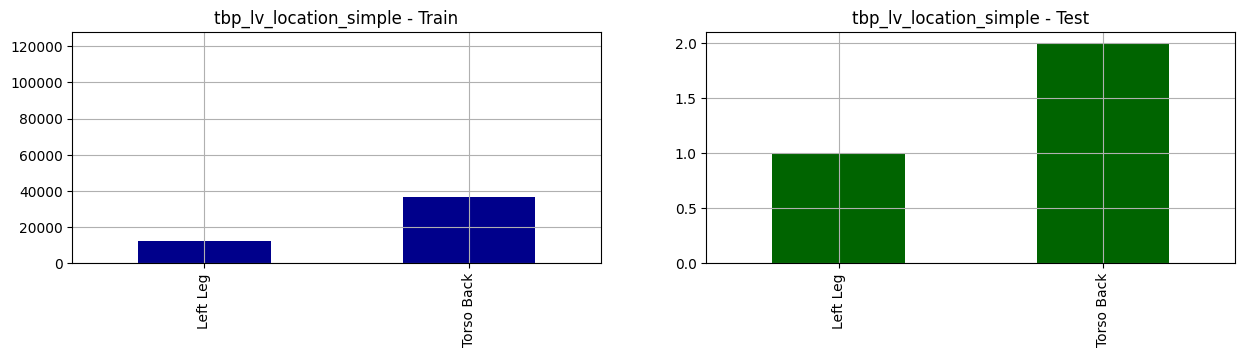

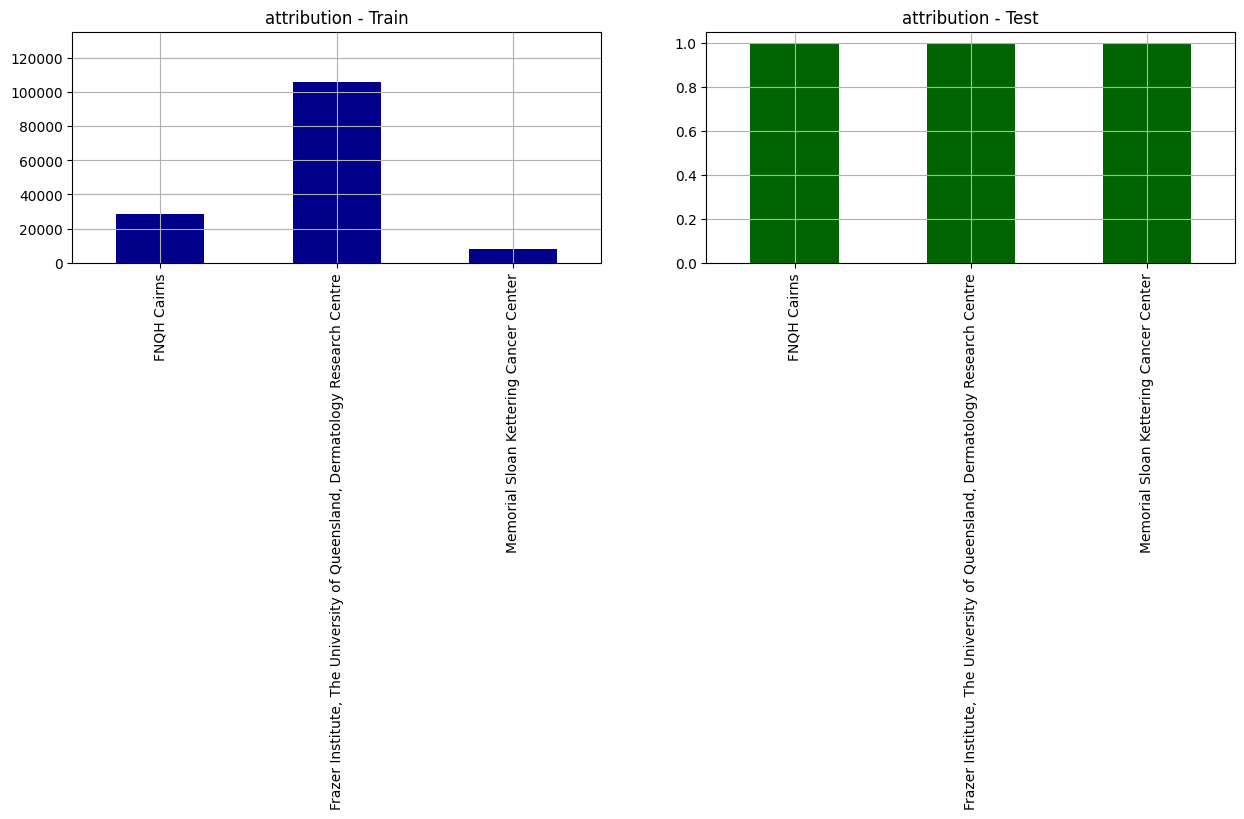

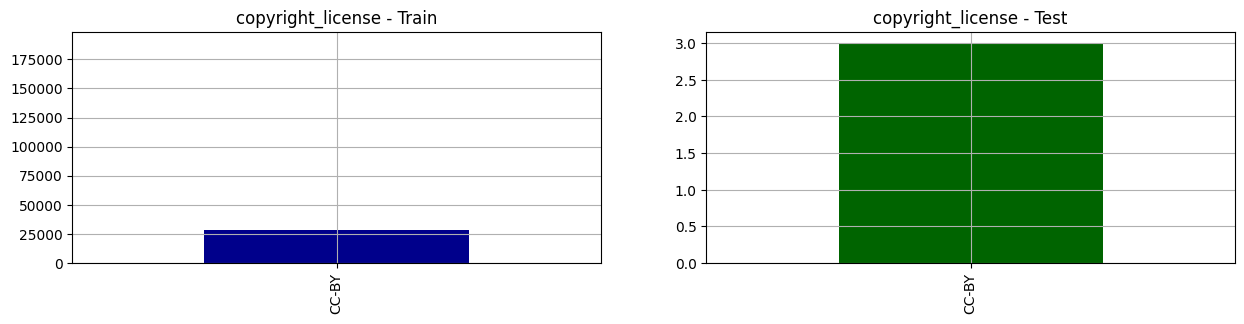

In [10]:
# plot categorical feature distributions (train and test)
for f in features_cat:
    plt.figure(figsize=(15,3))
    ax1 = plt.subplot(1,2,1)
    train_metadata[f].value_counts().sort_index().plot(kind='bar', color=default_color_1)
    plt.title(f + ' - Train')
    plt.grid()
    ax2 = plt.subplot(1,2,2, sharex=ax1)
    test_metadata[f].value_counts().sort_index().plot(kind='bar', color=default_color_2)
    plt.title(f + ' - Test')
    plt.grid()
    plt.show()

In [11]:
# dropping non-relevant features
features_cat.remove('image_type')
features_cat.remove('tbp_tile_type')
features_cat.remove('copyright_license')